# اعداد تصادفی

In [1]:
import numpy as np
import matplotlib.pyplot as plt



## تولید تصادفی اعداد

آیا کامپیوترها واقعا قادر به تولید اعداد تصادفی هستند؟

خیر، کامپیوترها به خودی خود <strong>قادر به تولید اعداد واقعاً تصادفی نیستند</strong>. کامپیوترها ماشین‌های قطعی (deterministic) هستند، به این معنی که اگر یک برنامه را با ورودی‌های یکسان چندین بار اجرا کنید، نتایج یکسانی تولید می‌شود. بنابراین، اعدادی که کامپیوترها تولید می‌کنند، <strong>شبه‌تصادفی (pseudo-random)</strong> هستند، نه واقعاً تصادفی.

---

### روش LCG

روش **مولد اعداد تصادفی خطی هم‌پوشان (Linear Congruential Generator - LCG)** یکی از ساده‌ترین و پرکاربردترین روش‌ها برای تولید اعداد شبه‌تصادفی است.

روش LCG از یک فرمول ساده برای تولید اعداد تصادفی استفاده می‌کند:

\[
r_{i+1} = (a \times r_i + c) \mod M
\]

- \( r_i \): عدد تصادفی فعلی
- \( a \): ضریب (ضریب تکثیر)
- \( c \): مقدار ثابت (عرض از مبدا)
- \( M \): مدول (دوره‌ی اعداد تصادفی)

عدد تصادفی بعدی (\( r_{i+1} \)) با استفاده از فرمول بالا محاسبه می‌شود. سپس، برای تولید یک عدد تصادفی بین ۰ و ۱، عدد به دست آمده را بر \( M \) تقسیم می‌کنیم.

---

#### پیاده سازی LCG

کلاس `myRandom` شامل متدهایی برای تولید اعداد تصادفی و ایجاد آرایه‌ای از اعداد تصادفی است. در ادامه، کد این کلاس و توضیحات مربوط به هر بخش را بررسی می‌کنیم.



#### کد کلاس

In [2]:
class myRandom():
    """یک کلاس برای تولید اعداد تصادفی
    """
    
    def __init__(self , seed : int, a : int = 11 , c : int = 2 , M : int = 25 ):
        """ متد شروع کننده کلاس

        seed (int): مقدار اولیه و شروع کننده عدد تصادفی
        a (int): ضریب در فرمول تولید اعداد
        c (int): عرض از مبدا در فرمول
        M (int): دوره‌ی اعداد تصادفی
        """
        self.a = a
        self.c = c 
        self.M = M

        self.r0 = seed
        
    def rNext(self) -> float:
        """ متد اصلی تولید عدد تصادفی بعدی

        $r_{i+1} = mod(a*r_i + c , M)$

        Returns:

        float : a random number between zeron and one
        """
        self.r0 = (self.a*self.r0 + self.c) % self.M
        r = float(self.r0)/self.M
        return r

    def generate(self , N : int ) -> np.array:
        """ یک متد برای تولید آرایه ای به طول دلخواه از اعداد تصادفی

        Returns:

        numpy.array
        """
        ret = []
        for i in range(N):
            ret.append( self.rNext() )
        return np.array( ret )

#### انتخاب مناسب پارامترها

##### M

- باید یک عدد بزرگ و ترجیحا توانی از ۲ باشد
- هرچه M بزرگ‌تر باشد، دوره‌ی تناوب طولانی‌تر خواهد بود.

##### a

- a باید به گونه‌ای انتخاب شود که نسبت به M اول باشد (یعنی بزرگ‌ترین مقسوم‌علیه مشترک a و M برابر با ۱ باشد).
- a−1 باید بر تمامی عوامل اول M بخش‌پذیر باشد.
- اگر M مضربی از ۴ باشد، a−1 نیز باید مضربی از ۴ باشد.

##### c

- c باید نسبت به M اول باشد (یعنی بزرگ‌ترین مقسوم‌علیه مشترک cc و MM برابر با ۱ باشد).
- اگر c=0، الگوریتم دوره‌ی کوتاه‌تری دارد

##### r_0

باید یک عدد صحبح کوچکتر از M-1 باشد.

##### مقادیر پیشنهادی:

$$M=2^{32}$$
$$a=1664525$$
$$c=1013904223$$
$$r_0 = 12345 $$

In [3]:
randomGen = myRandom( 12345 , M=2**32 , a=1664525 , c = 1013904223 )
randomVals = randomGen.generate( N = 100000)

## تستهای تصادفی بودن اعداد

### یکنواخت بودن احتمال

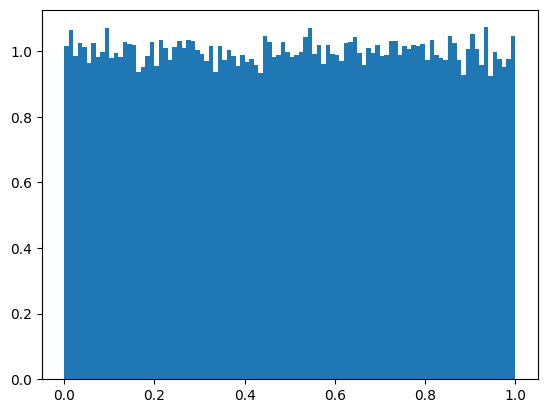

In [4]:
#randomVals = np.random.random(100000)
#plot the distribution of r values
_ , _ , _ = plt.hist( randomVals , 100 , density=True , histtype = 'stepfilled')
plt.show()

### گشتاورهای توزیع احتمال

گشتاورهای آماری (Moments) ابزارهایی مهم در آمار و احتمال هستند که برای توصیف توزیع یک متغیر تصادفی استفاده می‌شوند. لحظه‌ی \( n \)-ام یک متغیر تصادفی \( X \) به صورت زیر تعریف می‌شود:

$$
\text{Moment}_n = E[X^n]
$$

- $ E[X^n] $: مقدار مورد انتظار (میانگین) $ X^n $.

---

####  گشتاور n-ام برای توزیع یکنواخت

اگر $X$ یک متغیر تصادفی با توزیع یکنواخت در بازه‌ی $[0, 1]$ باشد، تابع چگالی احتمال (PDF) آن به صورت زیر است:

$$
f(x) = 
\begin{cases} 
1 & \text{if } 0 \leq x \leq 1 \\
0 & \text{otherwise}
\end{cases}
$$

در این حالت، مومنت n-ام به صورت زیر محاسبه می‌شود:

$$
E[X^n] = \int_{0}^{1} x^n \cdot f(x) \, dx = \int_{0}^{1} x^n \, dx
$$

با حل انتگرال، داریم:

$$
E[X^n] = \left[ \frac{x^{n+1}}{n+1} \right]_0^1 = \frac{1}{n+1}
$$

---

#### محاسبه‌ی ممنت n-ام برای داده‌های نمونه

در عمل، ما به جای توزیع نظری، با داده‌های نمونه (Sample Data) کار می‌کنیم. اگر $ X_1, X_2, \dots, X_N $ نمونه‌هایی از یک متغیر تصادفی $ X $ باشند، لحظه‌ی $ n$-ام به صورت زیر تخمین زده می‌شود:

$$
\text{Moment}_n \approx \frac{1}{N} \sum_{i=1}^{N} X_i^n
$$

- $ N $: تعداد نمونه‌ها.
- $ X_i $: مقدار $ i $-امین نمونه.

---

#### نرمال‌سازی لحظه‌ی n-ام

برای بررسی تصادفی بودن داده‌ها، می‌توانیم گشتاور n-ام را نرمال‌سازی کنیم. اگر داده‌ها از توزیع یکنواخت پیروی کنند، مقدار نرمال‌شده‌ی گشتاور n-ام باید به ۱ نزدیک باشد. این مقدار نرمال‌شده به صورت زیر محاسبه می‌شود:

$$
\text{Normalized Moment}_n = (n + 1) \times \text{Moment}_n
$$

با جای‌گذاری مقدار نظری $ E[X^n] = \frac{1}{n+1} $، داریم:

$$
\text{Normalized Moment}_n = (n + 1) \times \frac{1}{n+1} = 1
$$

---


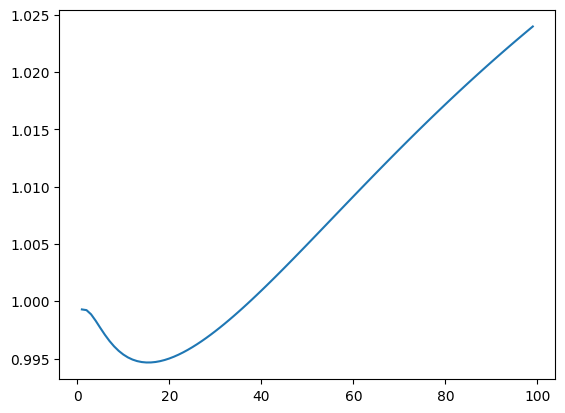

In [6]:
#moments
n_vals , moments = [] , []
x2n = randomVals.copy()
for n in range( 1, 100):
    n_vals.append(n)
    moments.append( (n+1)*np.average(x2n) )
    x2n *= randomVals

plt.plot( n_vals , moments )

### مطالعه‌ی خودهمبستگی (Autocorrelation)


در این بخش، از روش **خودهمبستگی (Autocorrelation)** برای بررسی تصادفی بودن اعداد استفاده می‌کنیم. این روش به ما کمک می‌کند تا بررسی کنیم آیا اعداد تولیدشده واقعاً تصادفی هستند یا الگوهای پنهانی در آن‌ها وجود دارد.

---

#### خودهمبستگی (Autocorrelation) چیست؟


$$R(k) = E[X_i \cdot X_{(i+k) \mod N}]$$

از آن‌جا که $ X_i $ و $ X_{(i+k) \mod N} $ مستقل هستند )برای $ k \neq 0 $(، داریم:

$$R(k) = E[X_i] \cdot E[X_{(i+k) \mod N}]$$

برای توزیع یکنواخت در بازه‌ی $[0, 1]$، مقدار مورد انتظار $ E[X_i] $ به صورت زیر محاسبه می‌شود:

$$E[X_i] = \int_{0}^{1} x \cdot f(x) \, dx$$

از آن‌جا که تابع چگالی احتمال )PDF( برای توزیع یکنواخت $ f(x) = 1 $ است، داریم:

$$E[X_i] = \int_{0}^{1} x \cdot 1 \, dx = \left[ \frac{x^2}{2} \right]_0^1 = \frac{1}{2}$$

بنابراین، مقدار انتظاری همبستگی چرخشی $ R(k) $ برای $ k \neq 0 $ برابر است با:

$$
R(k) = E[X_i] \cdot E[X_{(i+k) \mod N}] = \frac{1}{2} \times \frac{1}{2} = \frac{1}{4} = 0.25
$$


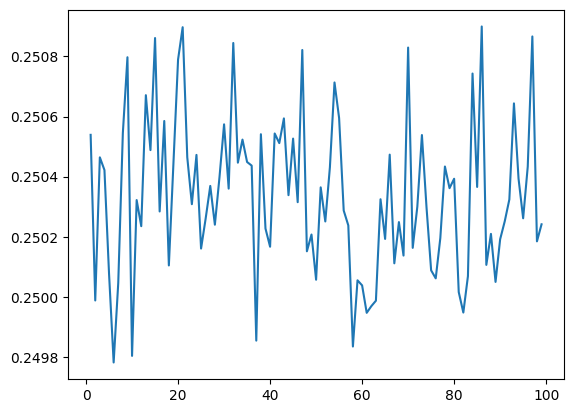

In [7]:
#validate the randomnes
randomVals = np.random.random(100000)
k_vals , results = [] , []
for k in range( 1 , 100 ):
    rolledRandoms = np.roll( randomVals , k )
    res = np.sum( randomVals * rolledRandoms )/len( randomVals )
    k_vals.append( k )
    results.append( res )
plt.plot( k_vals , results )

## تولید اعداد با توزیع دلخواه از توزیع یکنواخت

برای تولید اعداد تصادفی با توزیع دلخواه از اعداد تصادفی با توزیع یکنواخت، می‌توانیم از روش‌های زیر استفاده کنیم:

---

### تبدیل معکوس (Inverse Transform Sampling)

این روش برای توزیع‌هایی کاربرد دارد که تابع توزیع تجمعی (CDF) آن‌ها به صورت صریح قابل محاسبه و معکوس‌پذیر باشد.

### فرمول‌ها

فرض کنید $ X $ یک متغیر تصادفی با تابع چگالی احتمال (PDF) $ f(x) $ و تابع توزیع تجمعی (CDF) $ F(x) $ باشد. اگر $ U $ یک عدد تصادفی با توزیع یکنواخت در بازه‌ی $[0, 1]$ باشد، آن‌گاه:

$$
X = F^{-1}(U)
$$

- $ F^{-1} $: تابع معکوس CDF.
- $ U $: عدد تصادفی با توزیع یکنواخت در $[0, 1]$.

### مراحل اجرا

۱. **محاسبه‌ی CDF**: تابع توزیع تجمعی $ F(x) $ را محاسبه کنید.
۲. **معکوس‌سازی CDF**: تابع معکوس $ F^{-1}(u) $ را پیدا کنید.
۳. **تولید اعداد تصادفی**: برای هر عدد تصادفی $ U $ با توزیع یکنواخت، مقدار $ X = F^{-1}(U) $ را محاسبه کنید.

### مثال: توزیع نمایی

برای توزیع نمایی با پارامتر $ \lambda $، CDF و معکوس آن به صورت زیر هستند:

$$
F(x) = 1 - e^{-\lambda x}
$$
$$
F^{-1}(u) = -\frac{\ln(1 - u)}{\lambda}
$$

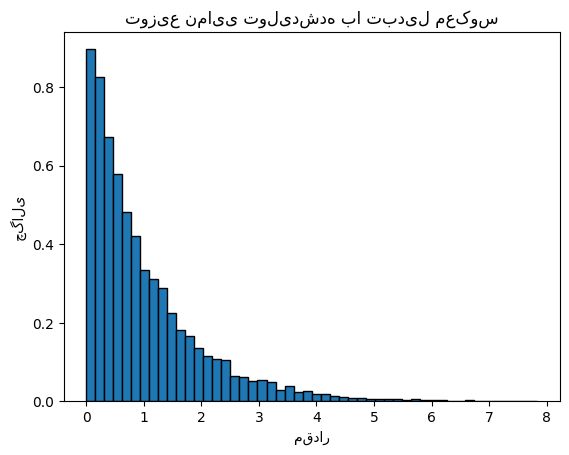

In [8]:
def inverse_transform_exponential(lambda_, size):
    U = np.random.uniform(0, 1, size)
    X = -np.log(1 - U) / lambda_
    return X

# تولید اعداد تصادفی با توزیع نمایی
lambda_ = 1.0  # پارامتر توزیع نمایی
samples = inverse_transform_exponential(lambda_, 10000)

# رسم هیستوگرام
plt.hist(samples, bins=50, density=True, edgecolor='black')
plt.title('توزیع نمایی تولیدشده با تبدیل معکوس')
plt.xlabel('مقدار')
plt.ylabel('چگالی')
plt.show()

### روش رد-اکسپت (Rejection Sampling) برای تولید اعداد با توزیع دلخواه

روش رد-اکسپت یک روش عمومی برای تولید اعداد تصادفی با توزیع دلخواه است. این روش زمانی مفید است که تابع توزیع تجمعی (CDF) توزیع هدف به راحتی قابل محاسبه یا معکوس‌سازی نباشد. در این روش، از یک توزیع کمکی (Proposal Distribution) استفاده می‌شود که به راحتی قابل نمونه‌گیری است.

---

### فرمول‌ها و مراحل اجرا

فرض کنید $ f(x) $ تابع چگالی احتمال (PDF) توزیع هدف و $ g(x) $ تابع چگالی احتمال توزیع کمکی باشد. همچنین، $ M $ یک ثابت باشد به طوری که:

$$
f(x) \leq M \cdot g(x) \quad \forall x
$$

#### مراحل اجرا:

۱. **نمونه‌گیری از توزیع کمکی**: یک عدد تصادفی $ X $ از توزیع کمکی $ g(x) $ تولید کنید.
۲. **نمونه‌گیری یکنواخت**: یک عدد تصادفی $ U $ از توزیع یکنواخت در $[0, 1]$ تولید کنید.
۳. **رد یا پذیرش**: اگر $ U \leq \frac{f(X)}{M \cdot g(X)} $ باشد، $ X $ را به عنوان نمونه بپذیرید؛ در غیر این صورت، آن را رد کنید.

---

### انتخاب توزیع کمکی و ثابت $M$

- **توزیع کمکی $ g(x) $**: باید به راحتی قابل نمونه‌گیری باشد و به توزیع هدف $ f(x) $ نزدیک باشد.
- **ثابت $ M $**: باید به گونه‌ای انتخاب شود که شرط $ f(x) \leq M \cdot g(x) $ برای همه‌ی $ x $ برقرار باشد. هرچه $ M $ کوچک‌تر باشد، کارایی روش بیشتر می‌شود.

---

### مثال: تولید اعداد با توزیع دلخواه

فرض کنید می‌خواهیم از توزیع زیر نمونه‌گیری کنیم:

$$
f(x) = \frac{3}{2} x^2 \quad \text{برای} \quad -1 \leq x \leq 1
$$

### انتخاب توزیع کمکی و ثابت $M$

- توزیع کمکی $ g(x) $ را به صورت یکنواخت در بازه‌ی $[-1, 1]$ انتخاب می‌کنیم:
  $$
  g(x) = \frac{1}{2} \quad \text{برای} \quad -1 \leq x \leq 1
  $$
  - ثابت $ M $ را به گونه‌ای انتخاب می‌کنیم که شرط $ f(x) \leq M \cdot g(x) $ برقرار باشد. از آن‌جا که $ f(x) $ در $ x = \pm 1 $ به حداکثر مقدار $ \frac{3}{2} $ می‌رسد، داریم:
  $$
  M = \frac{\max f(x)}{g(x)} = \frac{\frac{3}{2}}{\frac{1}{2}} = 3
  $$

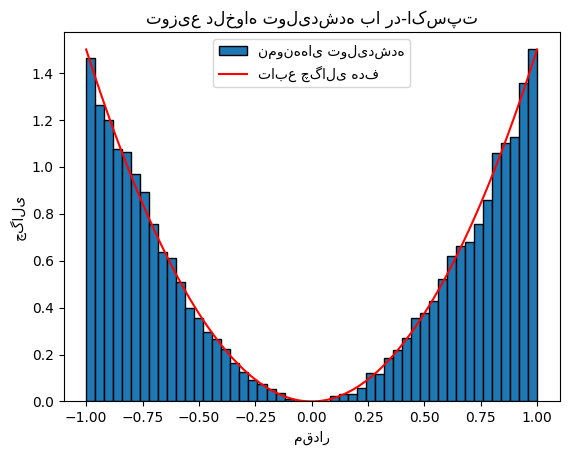

In [10]:

def f(x):
    return (3/2) * x**2  # تابع چگالی احتمال هدف

def g(x):
    return 1/2  # تابع چگالی احتمال توزیع کمکی (یکنواخت)

def rejection_sampling(f, M, size):
    samples = []
    while len(samples) < size:
        X = np.random.uniform(-1, 1)  # نمونه‌گیری از توزیع کمکی
        U = np.random.uniform(0, 1)  # نمونه‌گیری یکنواخت
        if U <= f(X) / (M * g(X)):  # شرط پذیرش
            samples.append(X)
    return np.array(samples)

# تولید اعداد تصادفی با توزیع دلخواه
M = 3  # ثابت M
samples = rejection_sampling(f, M, 10000)

# رسم هیستوگرام
plt.hist(samples, bins=50, density=True, edgecolor='black', label='نمونه‌های تولیدشده')
x_vals = np.linspace(-1, 1, 1000)
plt.plot(x_vals, f(x_vals), 'r-', label='تابع چگالی هدف')
plt.title('توزیع دلخواه تولیدشده با رد-اکسپت')
plt.xlabel('مقدار')
plt.ylabel('چگالی')
plt.legend()
plt.show()

### تمرین

```{admonition} Box-Muller
روش 
Box-Muller
برای تولید اعداد تصادفی با توزیع گاوسی چیست؟ آن را با پایتون پیاده سازی کنید و نشان دهید توزیع حاصل از تابع گاوسی تبعیت می‌کند.

چطور می‌توان ثابت کرد که این فرمول درست است؟

```

## کتابخانه‌ی <code>numpy.random</code>


کتابخانه‌ی `numpy.random` یکی از ابزارهای قدرتمند در پایتون برای تولید اعداد تصادفی با توزیع‌های مختلف است. این کتابخانه توابع متعددی برای تولید اعداد تصادفی با توزیع‌های گوناگون ارائه می‌دهد و در بسیاری از کاربردهای علمی، مهندسی و تحلیل داده‌ها استفاده می‌شود.

---

### نحوه‌ی استفاده

برای استفاده از `numpy.random`، ابتدا باید کتابخانه‌ی `numpy` را وارد کنید. سپس می‌توانید از توابع مختلف این کتابخانه برای تولید اعداد تصادفی استفاده کنید.

---

### توزیع‌های پشتیبانی‌شده

در زیر لیستی از توزیع‌های پشتیبانی‌شده توسط `numpy.random` و توابع مربوطه آورده شده است:

---

#### ۱. **توزیع یکنواخت (Uniform Distribution)**

- **توضیح**: اعداد تصادفی در یک بازه‌ی مشخص با احتمال یکسان.
- **تابع**: `np.random.uniform(low, high, size)`
  - `low`: حد پایین بازه.
  - `high`: حد بالای بازه.
  - `size`: تعداد اعداد تصادفی.

---

#### ۲. **توزیع نرمال (Normal Distribution)**

- **توضیح**: اعداد تصادفی با توزیع گاوسی (نرمال).
- **تابع**: `np.random.normal(loc, scale, size)`
  - `loc`: میانگین توزیع.
  - `scale`: انحراف معیار توزیع.
  - `size`: تعداد اعداد تصادفی.

---

#### ۳. **توزیع نمایی (Exponential Distribution)**

- **توضیح**: اعداد تصادفی با توزیع نمایی.
- **تابع**: `np.random.exponential(scale, size)`
  - `scale`: پارامتر scale توزیع نمایی.
  - `size`: تعداد اعداد تصادفی.

---

#### ۴. **توزیع پواسون (Poisson Distribution)**

- **توضیح**: اعداد تصادفی با توزیع پواسون.
- **تابع**: `np.random.poisson(lam, size)`
  - `lam`: پارامتر lambda (میانگین و واریانس توزیع).
  - `size`: تعداد اعداد تصادفی.

---

#### ۵. **توزیع دوجمله‌ای (Binomial Distribution)**

- **توضیح**: اعداد تصادفی با توزیع دوجمله‌ای.
- **تابع**: `np.random.binomial(n, p, size)`
  - `n`: تعداد آزمایش‌ها.
  - `p`: احتمال موفقیت در هر آزمایش.
  - `size`: تعداد اعداد تصادفی.

---

#### ۶. **توزیع بتا (Beta Distribution)**

- **توضیح**: اعداد تصادفی با توزیع بتا.
- **تابع**: `np.random.beta(a, b, size)`
  - `a`: پارامتر شکل اول.
  - `b`: پارامتر شکل دوم.
  - `size`: تعداد اعداد تصادفی.

---

#### ۷. **توزیع گاما (Gamma Distribution)**

- **توضیح**: اعداد تصادفی با توزیع گاما.
- **تابع**: `np.random.gamma(shape, scale, size)`
  - `shape`: پارامتر شکل.
  - `scale`: پارامتر scale.
  - `size`: تعداد اعداد تصادفی.

---

#### ۸. **توزیع کای‌دو (Chi-Square Distribution)**

- **توضیح**: اعداد تصادفی با توزیع کای‌دو.
- **تابع**: `np.random.chisquare(df, size)`
  - `df`: درجه آزادی.
  - `size`: تعداد اعداد تصادفی.

---

#### ۹. **توزیع وایبول (Weibull Distribution)**

- **توضیح**: اعداد تصادفی با توزیع وایبول.
- **تابع**: `np.random.weibull(a, size)`
  - `a`: پارامتر شکل.
  - `size`: تعداد اعداد تصادفی.

---

#### ۱۰. **توزیع لوگ‌نرمال (Log-Normal Distribution)**

- **توضیح**: اعداد تصادفی با توزیع لوگ‌نرمال.
- **تابع**: `np.random.lognormal(mean, sigma, size)`
  - `mean`: میانگین لگاریتمی.
  - `sigma`: انحراف معیار لگاریتمی.
  - `size`: تعداد اعداد تصادفی.

---

#### ۱۱. **توزیع چندجمله‌ای (Multinomial Distribution)**

- **توضیح**: اعداد تصادفی با توزیع چندجمله‌ای.
- **تابع**: `np.random.multinomial(n, pvals, size)`
  - `n`: تعداد آزمایش‌ها.
  - `pvals`: لیست احتمال‌های هر نتیجه.
  - `size`: تعداد اعداد تصادفی.

---

#### ۱۲. **توزیع دیریکله (Dirichlet Distribution)**

- **توضیح**: اعداد تصادفی با توزیع دیریکله.
- **تابع**: `np.random.dirichlet(alpha, size)`
  - `alpha`: پارامترهای شکل.
  - `size`: تعداد اعداد تصادفی.

---

#### ۱۳. **توزیع گاوسی چندمتغیره (Multivariate Normal Distribution)**

- **توضیح**: اعداد تصادفی با توزیع گاوسی چندمتغیره.
- **تابع**: `np.random.multivariate_normal(mean, cov, size)`
  - `mean`: بردار میانگین.
  - `cov`: ماتریس کوواریانس.
  - `size`: تعداد اعداد تصادفی.

---

#### ۱۴. **توزیع گسسته (Discrete Distribution)**

- **توضیح**: اعداد تصادفی با توزیع گسسته.
- **تابع**: `np.random.choice(a, size, p)`
  - `a`: لیست مقادیر ممکن.
  - `size`: تعداد اعداد تصادفی.
  - `p`: لیست احتمال‌های مربوط به هر مقدار.

---